<a href="https://colab.research.google.com/github/minhaz-28bipu/newproject/blob/main/Copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age  Height  Weight        Bmi       BmiClass
0   61    1.85  109.30  31.935720  Obese Class 1
1   60    1.71   79.02  27.023700     Overweight
2   60    1.55   74.70  31.092612  Obese Class 1
3   60    1.46   35.90  16.841809    Underweight
4   60    1.58   97.10  38.896010  Obese Class 2


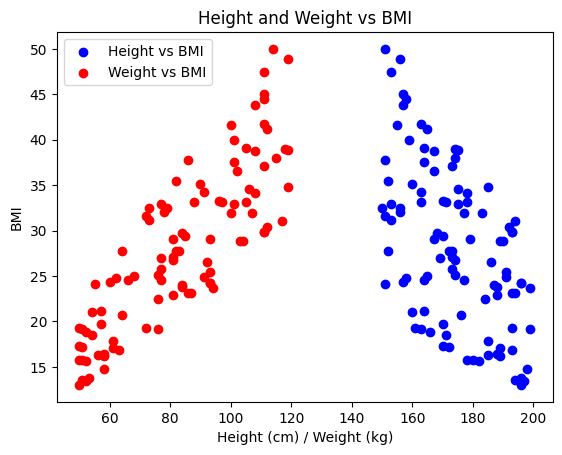

Mean Squared Error: 1.77
R-squared: 0.98


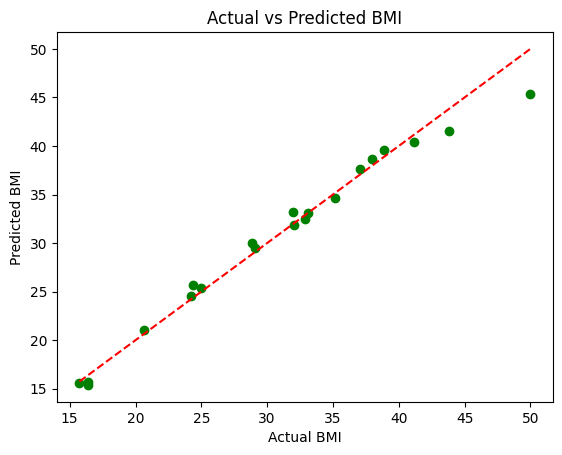

Predicted BMI for new data:
[23.38591976 23.05046612]


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/bmi.csv')
print(df.head())

df.describe()
np.random.seed(42)
num_samples = 100


heights = np.random.randint(150, 200, num_samples)
weights = np.random.randint(50, 120, num_samples)

bmi = weights / ((heights / 100) ** 2)


data = pd.DataFrame({'Height (cm)': heights, 'Weight (kg)': weights, 'BMI': bmi})


plt.scatter(data['Height (cm)'], data['BMI'], color='blue', label='Height vs BMI')
plt.scatter(data['Weight (kg)'], data['BMI'], color='red', label='Weight vs BMI')
plt.xlabel('Height (cm) / Weight (kg)')
plt.ylabel('BMI')
plt.title('Height and Weight vs BMI')
plt.legend()
plt.show()


X = data[['Height (cm)', 'Weight (kg)']]
y = data['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Actual vs Predicted BMI')
plt.show()


new_data = pd.DataFrame({'Height (cm)': [175, 160], 'Weight (kg)': [70, 55]})
predicted_bmi = model.predict(new_data)
print("Predicted BMI for new data:")
print(predicted_bmi)